In [36]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.neural_networks import *
from src.cross_validation import CrossValidation
import numpy as np

config = car_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [37]:
raw_data = data_processor.load_data()
data_1 = data_processor.impute_missing_values(raw_data)
data_2 = data_processor.encode_ordinal_features(data_1)
data_3 = data_processor.encode_nominal_features(data_2)
data_4 = data_processor.standardize_data(data_3,data_3,features=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [38]:
data_4

,buying,maint,doors,persons,lug_boot,safety,Class_acc,Class_good,Class_unacc,Class_vgood
0,-1.341253,-1.341253,-1.341253,-1.22439,-1.22439,-1.22439,0,0,1,0
1,-1.341253,-1.341253,-1.341253,-1.22439,-1.22439,0.00000,0,0,1,0
2,-1.341253,-1.341253,-1.341253,-1.22439,-1.22439,1.22439,0,0,1,0
3,-1.341253,-1.341253,-1.341253,-1.22439,0.00000,-1.22439,0,0,1,0
4,-1.341253,-1.341253,-1.341253,-1.22439,0.00000,0.00000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1723,1.341253,1.341253,1.341253,1.22439,0.00000,0.00000,0,1,0,0
1724,1.341253,1.341253,1.341253,1.22439,0.00000,1.22439,0,0,0,1
1725,1.341253,1.341253,1.341253,1.22439,1.22439,-1.22439,0,0,1,0
1726,1.341253,1.341253,1.341253,1.22439,1.22439,0.00000,0,1,0,0


In [39]:
data_train, data_val = cross_validator.random_partition(data_3, random_state=42)

In [40]:
data_test = data_val.to_numpy()
X_val = data_test[:,:-4]
y_val = data_test[:,-4:]

In [41]:
train_data = data_train.to_numpy()
X_train = train_data[:,:-4]
y_train = train_data[:,-4:]

In [49]:
linear = LinearNetwork(config)

losses, val_losses = linear.logistic_regression(X_train,y_train,X_val,y_val,epochs=100000,lr=0.001)

Epoch 0/100000, Training Loss: 1.3865223180411717, Validation Loss: 2.54970831506427
Epoch 100/100000, Training Loss: 1.2858389821440146, Validation Loss: 2.047686023121907
Epoch 200/100000, Training Loss: 0.829045695143334, Validation Loss: 1.1083190943564163
Epoch 300/100000, Training Loss: 0.7424356722993114, Validation Loss: 0.9855692706284568
Epoch 400/100000, Training Loss: 0.7079028807832999, Validation Loss: 0.9406190322969161
Epoch 500/100000, Training Loss: 0.6899486897965007, Validation Loss: 0.9205507464698629
Epoch 600/100000, Training Loss: 0.6783491464917435, Validation Loss: 0.9094114464177011
Epoch 700/100000, Training Loss: 0.6697513610662061, Validation Loss: 0.9018157399845376
Epoch 800/100000, Training Loss: 0.6628520108812596, Validation Loss: 0.8957395012350584
Epoch 900/100000, Training Loss: 0.6570571468439055, Validation Loss: 0.890368113501913
Epoch 1000/100000, Training Loss: 0.6520548721079018, Validation Loss: 0.8853639964767819
Epoch 1100/100000, Training

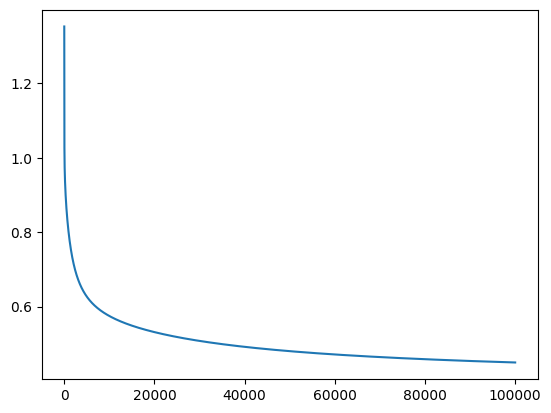

In [47]:
import matplotlib.pyplot as plt

plt.plot(val_losses)

In [43]:
ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=20,n_hidden_2=20,n_output=y_train.shape[1])

loss, val_metrics, final_mse = ffn.train(X_train,y_train,X_val,y_val,10000,0.0001)

Epoch 0/10000, Train Loss: 1.3457746157949728, Val Loss: 1.3476673835845765
Epoch 100/10000, Train Loss: 0.8371490987029254, Val Loss: 0.8763130473170674
Epoch 200/10000, Train Loss: 0.8289181371568562, Val Loss: 0.8684040087315661
Epoch 300/10000, Train Loss: 0.8279646682200862, Val Loss: 0.8678432746077742
Epoch 400/10000, Train Loss: 0.8276751085095234, Val Loss: 0.8678219595967646
Epoch 500/10000, Train Loss: 0.8268354609273821, Val Loss: 0.8670798778176376
Epoch 600/10000, Train Loss: 0.8139260436915192, Val Loss: 0.8525096914732831
Epoch 700/10000, Train Loss: 0.6487742765538937, Val Loss: 0.6775688609250737
Epoch 800/10000, Train Loss: 0.5396454881096205, Val Loss: 0.57094297995416
Epoch 900/10000, Train Loss: 0.5248911606244177, Val Loss: 0.5462399764760796
Epoch 1000/10000, Train Loss: 0.5276513752476093, Val Loss: 0.5422458895706981
Epoch 1100/10000, Train Loss: 0.4997609976183976, Val Loss: 0.5151689236925219
Epoch 1200/10000, Train Loss: 0.48852755818768046, Val Loss: 0.499

In [50]:
autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=4)

autoE.train(X_train, max_epochs=20000, lr=0.0001)

Epoch 0/20000, Loss: 1.7763225077330858
Epoch 1/20000, Loss: 1.3219765851536824
Epoch 2/20000, Loss: 1.063520032433738
Epoch 3/20000, Loss: 0.9507333745507602
Epoch 4/20000, Loss: 0.9136145591566004
Epoch 5/20000, Loss: 0.9031229445974249
Epoch 6/20000, Loss: 0.8999508288995084
Epoch 7/20000, Loss: 0.8985642371872369
Epoch 8/20000, Loss: 0.8976035397611758
Epoch 9/20000, Loss: 0.8967564949623908
Epoch 10/20000, Loss: 0.8959521047260096
Epoch 11/20000, Loss: 0.8951728863526828
Epoch 12/20000, Loss: 0.8944131530843931
Epoch 13/20000, Loss: 0.8936699423957357
Epoch 14/20000, Loss: 0.8929410533868211
Epoch 15/20000, Loss: 0.8922246105546235
Epoch 16/20000, Loss: 0.8915189534448958
Epoch 17/20000, Loss: 0.8908225968467922
Epoch 18/20000, Loss: 0.8901342076434618
Epoch 19/20000, Loss: 0.8894525869157924
Epoch 20/20000, Loss: 0.8887766547534987
Epoch 21/20000, Loss: 0.8881054370582677
Epoch 22/20000, Loss: 0.8874380540109071
Epoch 23/20000, Loss: 0.8867737099718658
Epoch 24/20000, Loss: 0.886

[1.7763225077330858,
 1.3219765851536824,
 1.063520032433738,
 0.9507333745507602,
 0.9136145591566004,
 0.9031229445974249,
 0.8999508288995084,
 0.8985642371872369,
 0.8976035397611758,
 0.8967564949623908,
 0.8959521047260096,
 0.8951728863526828,
 0.8944131530843931,
 0.8936699423957357,
 0.8929410533868211,
 0.8922246105546235,
 0.8915189534448958,
 0.8908225968467922,
 0.8901342076434618,
 0.8894525869157924,
 0.8887766547534987,
 0.8881054370582677,
 0.8874380540109071,
 0.8867737099718658,
 0.8861116846243773,
 0.885451325196599,
 0.8847920396216591,
 0.884133290513909,
 0.883474589856385,
 0.8828154943088246,
 0.8821556010578597,
 0.8814945441415553,
 0.8808319911894656,
 0.8801676405271458,
 0.8795012186006897,
 0.8788324776826015,
 0.8781611938252248,
 0.8774871650322115,
 0.8768102096221754,
 0.87613016476186,
 0.8754468851488917,
 0.8747602418265806,
 0.8740701211153096,
 0.8733764236468516,
 0.8726790634895385,
 0.8719779673535734,
 0.8712730738669945,
 0.8705643329138466

In [51]:
combined = CombinedModel(autoE,n_hidden_2=20,n_output=y_val.shape[1])

loss, val_metrics, final_loss = combined.train(X_train,y_train,X_val,y_val,epochs=15000,lr=0.0001)

Epoch 0/15000, Train Loss: 1.345650314467014, Val Loss: 1.3475540573153395
Epoch 100/15000, Train Loss: 0.8365431893406051, Val Loss: 0.8758133743984696
Epoch 200/15000, Train Loss: 0.8292769263576848, Val Loss: 0.8688102896421728
Epoch 300/15000, Train Loss: 0.8282482587064506, Val Loss: 0.8682024369814604
Epoch 400/15000, Train Loss: 0.8277073612077649, Val Loss: 0.8679363747017508
Epoch 500/15000, Train Loss: 0.8270614156964397, Val Loss: 0.8674114795373598
Epoch 600/15000, Train Loss: 0.8258115876862457, Val Loss: 0.8660565091401078
Epoch 700/15000, Train Loss: 0.8227578499297076, Val Loss: 0.8623639926622735
Epoch 800/15000, Train Loss: 0.8146509917737554, Val Loss: 0.8522110135102444
Epoch 900/15000, Train Loss: 0.7945180332884944, Val Loss: 0.8273205301481391
Epoch 1000/15000, Train Loss: 0.7475866508050242, Val Loss: 0.772535856366216
Epoch 1100/15000, Train Loss: 0.6394056838768557, Val Loss: 0.6604316974079887
Epoch 1200/15000, Train Loss: 0.5513500579759334, Val Loss: 0.5754